### Description
Recommodation system is used to predict or recommend value or products to customers. In our case we will be recommending academic carrer scores to Thanos so he can decide on the people to reduce to dust. A recommendation system tries to understand the relationship between a dataset and predict missing values or recommend products to users.

#### Algorithms recommendation systems 
There are different algorithms that can be used for a recommender system as listed below, we are going to use the collaborative filtering and the matrix factorization method.
1. Content based filtering 
2. Collaborative filtering
    - planet planet collaborative filtering
    - person person collaborative filtering 
3. Knowledge based filtering 
4. Matrix factorization

### Procedures used 
1. Exploratory data analysis 
    - load data 
    - Check the shape of the data 
    - Check details of the dataset
2. Collaborative filtering 
3. Matrix Factorization 
4. Predict the score for test data with matrix factorization


### Exploratory data analysis(EDA)

In [28]:
import pandas as pd 
import numpy as np
"""import training data"""
train_data = pd.read_csv("dataset/train.data")
train_data
test_data = pd.read_csv("dataset/test.data")
#test_data

In [29]:

train_data.shape

(704107, 3)

The training set has 704107 people  with three columns(planet, person, scores)

In [30]:
test_data.shape

(78235, 2)

 The test set has 78235 people with two colums(planet, person)

In [31]:
#Check if there are some persons in the test set that are not in the training set 
planet_train =  train_data.planet.unique()
planet_test =  test_data.planet.unique()
set(planet_test).difference(planet_train)


set()

Since the set is empty, it means the test set is a subset of the training set and every person in the test set was in the training set. The scores for the people in the test set is missing because avenges deleted them 

In [32]:
"""Check the number of planet in the training set"""
n_planet = train_data.planet.unique().shape[0] 
print(n_planet)

5000


In [33]:
"""Check the highest id for the planets"""
highest_planet_id = train_data['planet'].max()
print(highest_planet_id)

4999


This shows that the ID for planet is ranges from 0 - 4999

In [34]:

"""Check the number of person in the training set"""
n_person = train_data.person.unique().shape[0] 
print(n_person)

3598


In [35]:
"""Check the highest id for person"""
highest_person_id = train_data['person'].max()
print(highest_person_id)

3899


Note the number of unique person is not equal to the person with the highest value so the id for person range from 0 - 3899 but some numbers are missing 

In [36]:
"""Check the range of scores"""
n_score = train_data.score.unique().shape[0] 
print(n_score)

5


The scores range from 1 - 5

In [37]:
#train_data.sort_values(by=['planet'], ascending = False)

## Collaborative filtering 
For planet-planet collaborative filtering, we find similarities between planets, based on this similarities we recommend scores for people in those planets. 

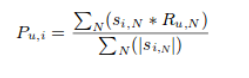

For person-person collaborative filtering, we find the similarities between persons, based on that we recommend scores

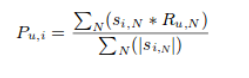

In [38]:
# Creating planet - person matrix to find the similarities between planet and person
planet_person_matrix = np.zeros((highest_planet_id, highest_person_id))
for line in train_data.itertuples():
    planet_person_matrix[line[1]-1, line[2]-1] = line[3]

In [39]:
# We use sklearn library to calculate similarities
from sklearn.metrics.pairwise import pairwise_distances 
planet_similarity = pairwise_distances(planet_person_matrix, metric='cosine')
person_similarity = pairwise_distances(planet_person_matrix.T, metric='cosine')

In [40]:
def predict_similarity(matrix, similarity, type='planet'):
    if type == 'planet':
        mean_planet_score = matrix.mean(axis=1)
        score_diff = (matrix - mean_planet_score[:, np.newaxis])
        predicted = mean_planet_score[:, np.newaxis] + similarity.dot(score_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
        print("Planet - planet collaborative filtering")
        print(predicted)
    elif type == 'person':
        predicted = matrix.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
        print("Person - person collaborative filtering")
        print(predicted)
    return predicted

In [41]:
planet_prediction = predict_similarity(planet_person_matrix, planet_similarity, type='planet')


Planet - planet collaborative filtering
[[-0.01942323  0.02107529  0.3648367  ... -0.03466033 -0.03387325
   0.08480908]
 [-0.06684876 -0.02595905  0.33028002 ... -0.08114582 -0.0815607
   0.04222054]
 [-0.03522653  0.01034071  0.36013823 ... -0.04952257 -0.04963236
   0.06957824]
 ...
 [-0.07246612 -0.02816645  0.31258735 ... -0.08719984 -0.08731273
   0.03212811]
 [ 0.13061695  0.1732889   0.51029878 ...  0.11663003  0.1156225
   0.23383446]
 [ 0.02130384  0.06155214  0.39064321 ...  0.00672171  0.00656905
   0.12370521]]


In [42]:
person_prediction = predict_similarity(planet_person_matrix, person_similarity, type='person')

Person - person collaborative filtering
[[0.0766071  0.07313709 0.0684293  ... 0.07515959 0.07791281 0.07367897]
 [0.03342887 0.03081504 0.03030653 ... 0.03361054 0.03359386 0.03270824]
 [0.0630078  0.06308569 0.05875232 ... 0.06354606 0.0643545  0.06055578]
 ...
 [0.02800294 0.02721143 0.02362549 ... 0.02801665 0.02833357 0.02623697]
 [0.21985941 0.21666893 0.20329238 ... 0.22222736 0.21895846 0.2153902 ]
 [0.11466983 0.10924265 0.09735815 ... 0.11521554 0.11582949 0.10915748]]


## Matrix factorization

This require latent features that helps to remove noise from data by removing the features which does not determine the score of a person in a planet

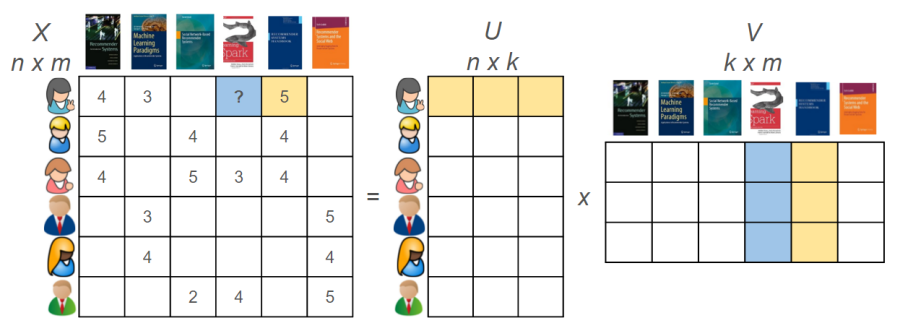

### matrix factorization
1. create a class

2. create the __init__ method to initialize important variables 

3. Create method matrix_factor_model which return the rmse list and iteration list. The rmse list contain the rmse for each iteration
   
    +create P which is the planet feature affinity matrix, it represents the association between planets and freatures 
    +create Q which is the person features affinity matrix, it represents the association between person and features
    +initialize biases and train the model
4. create rmse methos to calcualte the rmse for each iteration
5. create sgd method, that is stochatic gradient descent to optimimize the model
6. create get-score method to predict missing scores 
7. create plot graph method to plot the graph of the results

In [43]:
"""Get the sparsity of the training data"""
sparsity = float(len(planet_person_matrix.nonzero()[0]))
sparsity /= (planet_person_matrix.shape[0] * planet_person_matrix.shape[1])
sparsity *= 100
print ('percentage of planet-person that have scores: {:.2f}%'.format(sparsity))

percentage of planet-person that have scores: 3.61%


In [44]:
class matrix_factorization():
    
    #initializing the important variables in the contructor method 
    def __init__(self, planet_person, latent_feature, alpha, beta, iterations):
        
        #initizating variables gotten from the data
        self.planet_person = planet_person
        self.n_planets, self.n_persons = planet_person.shape
        self.latent_feature = latent_feature
        self.iterations = iterations
        
        #initialize hypermeters
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

   
    def matrix_factor_model(self):
         # Initializing planet-feature P and person-feature Q matrix 
        self.P = np.random.normal(scale=1./self.latent_feature, size=(self.n_planets, self.latent_feature))
        self.Q = np.random.normal(scale=1./self.latent_feature, size=(self.n_persons, self.latent_feature))

        # Initializing the bias
        self.b_pl = np.zeros(self.n_planets)
        self.b_pe = np.zeros(self.n_persons)
        self.b = np.mean(self.planet_person[np.where(self.planet_person != 0)])

        # List of training samples
        self.samples = [
        (i, j, self.planet_person[i, j])
        for i in range(self.n_planets)
        for j in range(self.n_persons)
        if self.planet_person[i, j] > 0
        ]

        #iterating through the data and using stochastic gradient optimization technique
        rmse_list  = []
        iteration_list = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            rmse = self.rmse()
            rmse_list.append(rmse)
            iteration_list.append(i+1)
            if (i+1) % 1 == 0:
                print("Iteration: %d : rmse = %.4f" % (i+1, rmse))
        
        return rmse_list, iteration_list

    # Calculate the RMSE - Root Mean Square Root 
    def rmse(self):
        xs, ys = self.planet_person.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.planet_person[x, y] - predicted[x, y], 2)
        rmse =np.sqrt(error / predicted.shape[0])
        return rmse

    # Using stochastic gradient descent
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_score(i, j)
            e = (r - prediction)

            self.b_pl[i] += self.alpha * (e - self.beta * self.b_pl[i])
            self.b_pe[j] += self.alpha * (e - self.beta * self.b_pe[j])

            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    # predict the score for a person in a planet 
    def get_score(self, i, j):
        prediction = self.b + self.b_pl[i] + self.b_pe[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    # Full planet-person matrix
    def full_matrix(self):
        return mf.b + mf.b_pl[:,np.newaxis] + mf.b_pe[np.newaxis:,] + mf.P.dot(mf.Q.T)
    
    """Plot the graph of the result gotten from the model"""
    def plot_graph(self, error_list, iteration_list): 
    
        plt.rcParams["figure.figsize"] = 10, 7
        figure, ((ax1))  = plt.subplots(1, 1, sharey='none' )
        ax1.set_title("RMSE vs Iteration")
        ax1.plot( iteration_list, error_list)
        ax1.set(xlabel = "Iterations" )
        ax1.set(ylabel = "RMSE")
        ax1.legend()
        plt.show()

In [45]:
# create planet-person matrix and fill the empty cell with 0
planet_person = np.array(train_data.pivot(index = 'planet', columns ='person', values = 'score').fillna(0))


In [46]:
#Training the model with the class matrix_factorization
mf = matrix_factorization(planet_person, latent_feature=20, alpha=0.01, beta=0.01, iterations=50)
rmse_list, iteration_list = mf.matrix_factor_model()
print()
print("\n Predicted Scores \n P x Q:")
predicted = mf.full_matrix()
print(predicted)
print()

Iteration: 1 : rmse = 0.9858
Iteration: 2 : rmse = 0.9729
Iteration: 3 : rmse = 0.9672
Iteration: 4 : rmse = 0.9603
Iteration: 5 : rmse = 0.9468
Iteration: 6 : rmse = 0.9285
Iteration: 7 : rmse = 0.9089
Iteration: 8 : rmse = 0.8892
Iteration: 9 : rmse = 0.8707
Iteration: 10 : rmse = 0.8542
Iteration: 11 : rmse = 0.8398
Iteration: 12 : rmse = 0.8276
Iteration: 13 : rmse = 0.8174
Iteration: 14 : rmse = 0.8087
Iteration: 15 : rmse = 0.8011
Iteration: 16 : rmse = 0.7946
Iteration: 17 : rmse = 0.7889
Iteration: 18 : rmse = 0.7840
Iteration: 19 : rmse = 0.7795
Iteration: 20 : rmse = 0.7755
Iteration: 21 : rmse = 0.7717
Iteration: 22 : rmse = 0.7684
Iteration: 23 : rmse = 0.7657
Iteration: 24 : rmse = 0.7629
Iteration: 25 : rmse = 0.7603
Iteration: 26 : rmse = 0.7581
Iteration: 27 : rmse = 0.7560
Iteration: 28 : rmse = 0.7541
Iteration: 29 : rmse = 0.7522
Iteration: 30 : rmse = 0.7505
Iteration: 31 : rmse = 0.7489
Iteration: 32 : rmse = 0.7476
Iteration: 33 : rmse = 0.7460
Iteration: 34 : rms

No handles with labels found to put in legend.


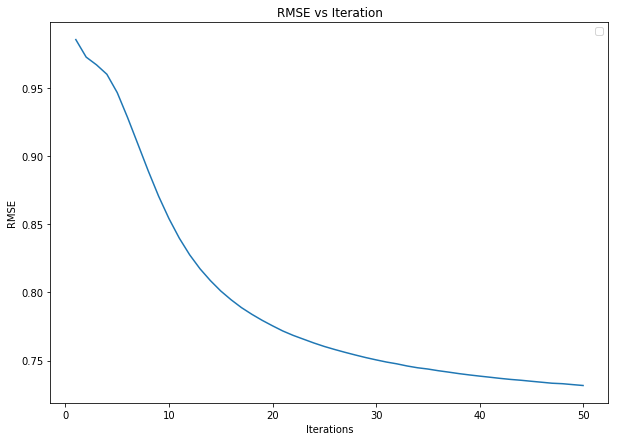

In [47]:
import matplotlib.pyplot as plt
mf.plot_graph(rmse_list, iteration_list)

## Predict the score for test data with matrix factorization

In [48]:
# Predicting the scores for planet and person in the test data 
for index, row in test_data.iterrows():
    print("%.6f"%(predicted[row["planet"], row["person"]]))


2.277563
3.198951
2.868085
2.163243
4.725570
2.091450
3.920391
2.762406
2.602993
3.210239
4.066468
2.632330
3.064441
2.441887
3.484966
3.701479
1.976363
2.720615
3.801464
4.459293
1.957573
3.430088
1.082704
2.491655
2.773325
2.868433
3.626947
2.738778
3.304187
4.030001
2.196589
3.180432
3.691906
3.864318
3.530382
2.810797
3.580772
3.189717
3.944245
2.373141
2.768932
3.102230
1.523670
2.305398
3.010049
3.716179
3.949281
3.526294
2.985263
3.697545
2.772831
3.408585
2.279042
2.695292
2.576640
3.823031
2.933897
3.835840
2.964367
2.727438
4.537364
2.082262
3.141059
1.923543
2.123166
3.691602
2.786786
4.016092
3.471315
3.756721
3.658467
3.547783
2.822637
3.471513
3.446602
3.676832
2.918962
3.101397
4.095674
3.305383
3.537547
4.033332
1.246738
4.052553
2.331349
4.477142
3.010431
3.822089
3.312794
2.619524
2.907221
4.739542
3.791998
2.687646
2.501143
3.732459
3.036985
3.354729
3.011861
3.820632
3.100943
4.097326
2.810550
3.630856
2.424510
3.244671
1.966144
3.374264
2.901788
3.915949
2.088750
4

2.919160
3.577140
4.474791
4.002900
4.154804
1.958398
3.343066
1.730753
4.109031
3.986218
4.271152
2.239221
2.750173
2.281999
2.232779
4.114155
3.214922
3.201732
4.761160
4.218188
3.630096
4.083056
2.891600
3.758188
3.851877
2.757424
3.920776
3.813051
2.462062
4.374686
2.871680
2.987712
3.179423
3.951250
3.631531
2.187011
3.309070
3.587829
3.923758
3.756588
3.860653
3.905797
1.658635
2.982938
4.378934
1.839321
2.266891
1.904782
0.884046
3.494190
1.661284
4.100266
3.098298
4.321664
3.151421
3.170038
3.513228
2.501857
3.986717
2.906070
3.192560
3.958419
3.573205
2.499221
3.651464
3.789434
2.216509
3.261402
2.686870
4.607045
2.815907
3.400450
3.295293
3.678604
2.614895
2.182107
2.824121
2.727855
3.069300
3.431504
3.496289
3.744466
2.168482
4.840386
3.071231
3.480559
2.404268
3.003567
3.894944
4.761905
2.467898
4.052304
4.004343
3.254492
3.131689
2.305938
2.392073
1.421222
2.882878
3.798047
3.595358
3.324383
3.249743
2.529095
1.922018
2.757589
1.931166
2.994018
1.544636
2.251164
2.475163
2

4.069512
2.775308
3.799987
2.722091
3.836996
2.582627
4.086361
3.386952
3.373944
4.309276
3.398093
1.622647
3.698878
4.086051
2.189885
3.319268
4.140785
3.993879
3.685385
3.209182
4.345491
1.645736
2.620285
3.615438
3.991394
4.646334
4.248151
2.766039
2.775575
2.531228
3.232547
3.215855
3.367187
3.077922
4.987890
3.292572
1.627656
2.577170
3.998816
2.903412
0.430840
3.068098
4.468133
3.300124
3.544168
4.392825
2.152121
3.930073
4.311813
2.581919
1.951940
2.931169
4.602523
3.891112
2.277558
2.875883
3.086002
0.553235
0.758223
4.307734
2.507651
3.000530
3.643968
3.819903
4.965617
4.138993
2.536407
2.979533
3.178906
2.262675
3.229192
3.365045
2.677147
1.614496
3.385952
2.580800
2.442946
2.477631
2.824923
3.612233
1.015575
2.422330
3.665647
3.051992
4.607834
2.917458
2.910803
2.863075
2.439068
3.858270
2.984277
2.941775
1.818129
4.003640
2.506716
4.542276
3.070018
2.887425
2.802415
3.335098
0.493746
2.426679
2.734388
3.207257
3.472771
2.421017
2.858022
2.631846
4.191337
2.146881
2.210911
2

3.842942
2.761840
3.392848
3.344992
1.790474
3.698548
1.242935
4.000456
2.182417
3.623421
2.728791
3.679504
3.143143
2.488908
3.113160
3.757441
4.228009
2.346987
2.941274
2.799317
2.372634
3.746815
2.376448
3.353810
4.124603
2.641935
3.375667
3.927842
3.751085
2.903214
3.583254
3.739541
4.085709
2.828321
3.373365
3.245675
3.367979
3.657185
1.435309
3.239253
1.031666
2.122766
1.866935
4.031545
2.450142
2.957485
2.448413
2.271836
3.861815
2.629278
3.793311
3.607982
3.432232
3.200170
4.028895
4.677937
5.147705
4.360358
4.462408
3.565701
2.937340
3.441363
1.359957
3.430626
3.950939
4.118557
2.616405
2.387904
2.081082
3.396897
4.222302
3.886706
2.797710
3.415228
3.676660
3.525911
1.234866
4.567061
1.101458
3.713492
2.162371
3.023751
1.800867
3.775015
2.494203
2.966654
3.072632
3.240935
3.359098
1.828622
4.754462
4.308737
3.774737
3.853742
5.236398
3.304834
1.821587
3.789030
2.623440
1.599323
2.651587
4.775937
4.307669
3.345473
1.405734
3.665146
3.973130
3.872717
3.520631
4.245277
4.017449
3

3.647036
5.078962
4.425502
1.600447
4.534983
3.709831
2.808144
3.599088
3.001897
3.293973
3.038831
3.514118
2.544960
4.773239
2.954593
3.558072
3.038206
3.890981
3.964822
3.241731
3.708834
1.777701
2.519595
3.744568
3.507856
4.845770
4.757770
5.268605
2.489786
2.634583
3.281850
2.935605
2.678441
3.626047
2.955922
3.921105
0.500500
2.887373
2.310032
4.727144
3.002133
4.363428
3.698027
3.372200
2.827750
3.443799
1.226865
2.617870
3.071874
3.293924
3.949481
4.712323
2.204360
4.188061
2.747464
3.625555
1.762642
4.008006
5.081030
3.072601
3.980632
3.355349
2.715746
3.825260
3.586707
3.075154
2.075154
2.506552
3.295156
3.480638
3.298846
2.801957
2.896992
4.615535
3.475749
3.325258
2.935696
1.139838
2.779313
4.021611
3.132079
3.665217
2.965485
1.891997
3.175023
3.920726
4.163112
2.023546
3.996255
2.500325
4.271203
2.144916
3.441290
3.578122
5.029520
2.616338
3.750872
2.697058
4.561007
2.942799
1.989670
4.846203
3.829162
3.955707
2.178430
2.403529
3.576911
2.747784
4.692903
2.399952
1.603428
1

2.281909
2.913800
2.312002
2.907171
2.144870
3.051087
3.495553
1.959975
2.952676
2.808487
3.248151
2.589031
3.118501
3.250424
3.232234
3.148417
3.131051
2.253666
2.312626
3.742324
3.064865
2.138078
3.108001
3.252657
4.202432
3.559750
4.350777
2.528928
2.790838
3.348286
2.293439
2.547083
4.195517
2.637068
1.292462
2.779689
3.334697
4.129345
4.312291
1.655866
3.768521
2.762118
2.527904
2.347658
4.358058
4.380692
3.675691
3.251472
4.771853
2.619207
1.517927
2.149408
2.539920
4.277349
2.878896
2.532699
3.921150
4.885963
3.843696
3.183400
4.844565
1.292084
2.841923
3.162968
3.522628
1.952838
2.537637
3.803573
3.375759
3.384577
3.735748
2.465612
2.358047
3.401688
3.412581
3.946752
4.511987
4.838327
3.281512
2.593833
3.341101
3.603104
3.463063
3.111502
3.533978
3.475637
3.224534
2.362311
2.785557
2.835187
3.414468
2.941689
3.723269
3.693702
0.827992
3.289570
3.831209
1.973174
4.659236
3.933571
3.440282
2.591175
1.469712
2.901875
1.639751
3.763103
3.547444
3.432996
3.157280
1.670809
3.234045
4

2.395076
3.299920
2.395425
3.596396
2.689322
0.756611
1.116267
2.363570
4.058114
2.989465
3.118553
3.189277
3.561556
4.351418
3.404993
2.623746
2.485463
4.566422
4.427952
2.530174
2.994806
2.636750
3.662139
3.673681
2.821523
3.128639
2.058603
2.366208
3.101455
2.947774
2.983363
1.326022
4.194474
4.126041
2.855892
3.720377
3.159828
3.693508
1.950769
3.014263
3.716881
3.483647
3.426749
3.513744
3.791873
3.282609
4.184670
1.635049
1.891389
3.206882
2.573810
1.447471
3.735323
1.369064
4.218686
4.149340
3.923079
3.237003
0.779914
4.077087
4.752201
2.254279
2.401630
4.148393
3.058586
2.216792
2.325869
1.204013
1.879445
4.008023
2.773428
1.450501
3.321165
3.490345
1.147187
4.089911
4.042670
2.107422
4.564945
3.610873
3.475732
3.212061
3.973466
2.781484
4.114741
3.898998
3.267054
3.812048
1.126788
3.418304
3.249008
2.899529
2.920884
3.726943
3.744699
3.411179
3.929847
1.936586
2.696982
1.142291
3.293020
3.952389
3.212711
1.052643
3.177704
3.458157
3.148605
3.930856
4.334836
1.960187
2.543728
2

2.814228
4.212626
2.448104
4.044765
1.515536
1.513541
4.092070
3.531857
3.647049
3.497047
2.316634
3.650343
3.344921
2.552514
1.477604
2.657762
3.948137
3.299259
2.788264
4.389256
2.826612
3.602735
3.061403
4.385228
4.452099
2.859240
3.198998
2.880160
3.112373
2.743399
2.575708
3.028495
3.786239
4.147256
2.163988
3.025297
1.355277
4.884441
2.898609
3.190112
2.336824
3.350149
3.489848
2.955620
2.596200
3.017752
1.264938
3.428240
2.839345
3.898220
2.628799
2.455454
4.636403
2.991095
2.530886
4.445102
4.024372
4.041611
0.949808
0.884083
3.658389
2.492549
5.173710
3.027433
4.742283
2.663662
3.626027
3.205265
3.404869
4.033978
3.497809
2.077096
3.653577
2.963492
2.541273
2.674396
3.548516
2.374566
3.338447
3.118690
2.193410
2.006514
2.367537
3.915000
3.980136
4.289429
2.919101
3.068514
1.629987
1.584257
2.872250
3.290416
2.393291
4.076676
2.630837
2.412241
2.457084
3.651709
3.786987
4.387506
2.826962
0.962028
3.189153
2.729329
3.073788
1.090266
4.899236
4.921665
3.196809
3.252082
3.538633
3

1.629273
1.786319
2.212971
3.579439
3.500379
2.864918
3.058241
3.467439
1.824814
3.064543
3.643329
2.227763
3.527198
2.235031
1.489018
2.541585
1.328794
3.495323
2.381817
2.652566
3.574893
2.087341
3.606105
4.699628
3.424790
1.304050
2.522312
2.127703
3.633900
4.960820
3.481782
3.098024
2.782084
4.698367
3.682420
4.089680
4.563092
4.596357
2.455362
2.137714
4.529193
3.702463
2.150909
2.661116
3.478198
3.012652
3.192266
2.692805
3.042266
2.173898
3.922883
3.456261
3.946839
2.244244
2.133687
2.281946
3.855735
2.899135
3.755651
1.253386
3.306620
4.470930
3.562370
2.926128
3.490226
3.300274
4.514491
3.477088
4.525291
2.563139
3.649486
2.933773
2.291216
2.911910
3.610157
2.962824
3.573679
2.706071
4.137449
2.068964
3.223148
2.788178
3.471721
2.931700
3.987693
3.712667
4.608123
2.846472
3.200831
4.019087
2.834094
2.944431
1.928591
3.261370
2.903086
2.312211
3.662305
3.699356
1.166257
1.259845
3.537450
2.352362
2.993829
2.653688
3.043402
3.830637
3.398906
4.486708
3.173269
3.055552
3.517469
2

3.583268
4.523902
1.976696
3.418286
2.253198
3.109334
2.833372
2.769249
3.973110
1.995966
3.469711
3.773224
3.284270
4.724868
1.906212
4.043275
2.502682
3.457586
3.442269
2.842310
2.763806
4.707347
3.799087
3.613239
2.746091
2.423681
3.948481
3.602252
4.145967
3.106379
3.018846
3.038417
3.018470
1.334924
4.645109
1.590240
3.330095
2.673831
3.115072
1.607651
3.438547
2.785879
3.830494
3.254723
3.275799
3.124393
3.996587
3.125444
2.562070
4.803873
3.727202
2.152885
3.055313
2.979257
3.947113
3.852887
3.343703
2.224084
2.963565
3.055956
2.955404
3.843824
4.118520
4.718889
1.727817
2.962998
2.700049
2.565300
3.285011
3.544078
2.597793
0.909116
4.815729
4.381542
3.581917
4.256712
3.819137
2.714056
3.434673
3.262471
3.922600
3.120560
2.566400
3.423029
2.494537
1.278097
3.264106
3.644271
3.600040
3.367607
2.052447
3.926668
2.829804
1.710671
3.173389
1.535785
2.202189
4.115566
3.655230
3.407090
2.444881
3.194995
3.530644
4.509033
2.914301
3.092296
3.313956
3.343336
2.439316
3.447354
4.303628
3

2.967103
3.062241
3.463902
3.472297
3.760908
3.472695
2.629850
2.759137
3.384490
4.083437
3.129800
3.208604
1.885689
3.367248
2.989384
3.597644
1.776491
3.401127
2.937250
3.252187
1.185353
3.169499
1.446492
3.782684
1.025846
3.038037
3.473033
2.991705
2.677014
5.027968
1.496377
3.580467
4.093915
3.435158
3.310000
3.474274
4.151122
2.975880
3.640763
3.661915
3.233313
4.192424
3.747274
3.555142
3.178598
2.576843
4.080013
3.635738
3.239651
4.392569
3.167416
3.706587
2.706345
2.714559
3.400923
3.079065
1.546407
2.946321
2.885503
3.448790
1.864314
3.263808
1.861496
2.540271
4.214053
1.848840
2.264973
1.664956
3.350016
3.760042
3.040886
1.998803
3.209025
3.151687
3.759877
1.730023
3.857767
4.056192
3.954935
1.468976
3.125358
0.907101
3.408747
3.486265
4.571958
4.074424
1.386699
3.006279
3.793818
2.982463
3.004358
4.318221
3.177099
4.660417
3.794228
3.699004
2.245275
3.785061
2.844798
2.394367
2.582097
2.327035
2.999347
3.752491
2.002272
2.385718
4.542208
3.772481
3.479949
4.458362
3.605357
3

3.886053
3.113449
2.899817
3.803582
2.928145
2.831551
3.499174
2.784161
3.057304
2.471376
2.175835
3.184476
5.027289
2.305653
3.271679
4.364272
4.111299
3.457644
3.601220
2.511224
3.260340
1.203127
3.326975
3.298953
2.854421
2.073059
3.350846
3.643448
3.302899
3.732980
2.863703
2.996967
2.574489
4.445723
2.611629
3.784167
2.729247
2.548633
3.159892
2.458485
2.114993
3.631663
3.805771
2.206007
2.091679
2.548348
3.341632
2.830325
2.454787
3.808471
2.282279
4.382459
2.195210
3.753203
3.835760
3.655287
3.057923
4.071809
1.961803
1.834225
3.994149
2.815778
1.623264
2.046158
3.665054
3.563194
2.427514
3.902449
2.544124
2.692954
2.741800
1.295360
4.115375
0.300768
3.066955
3.878029
1.624193
1.515341
1.234565
1.376210
4.102057
2.666265
1.901909
3.559965
2.391892
3.900360
3.133418
4.637259
4.298624
4.050145
3.170861
3.350976
3.518607
2.710215
3.924840
2.310958
3.406255
3.794047
3.199447
3.815773
2.704154
4.034806
3.155668
2.855527
3.647199
3.593983
3.973129
2.565658
4.438525
2.936021
2.807781
4

2.957197
3.686582
4.266231
2.512301
3.003424
3.272106
3.605261
4.007421
3.149023
4.306010
4.498475
4.365387
4.033122
1.985300
3.322135
4.537928
2.568200
3.246232
1.682078
2.043836
3.803706
2.314793
3.521268
2.654352
3.350786
1.926289
3.492724
5.168781
3.290383
3.870091
4.116567
2.951321
3.168008
4.169522
4.575578
0.833740
4.265421
3.023276
3.916783
2.919964
4.680284
2.715117
2.272056
2.226561
2.020275
3.040589
3.225030
2.511624
3.744113
4.649738
4.165112
2.502123
3.294289
2.450500
4.351315
2.209811
2.540390
3.338220
2.113072
3.246489
2.738559
3.024229
2.901270
3.091714
2.434846
2.495095
2.869097
3.954818
3.758123
2.221201
1.661423
4.125134
4.034161
3.467469
3.374779
2.491832
3.666731
2.121229
3.422853
2.491853
4.423552
3.627931
0.701457
2.932921
2.438900
3.053655
1.848482
3.579341
1.202184
3.621381
2.909967
4.353871
2.039357
4.017157
4.376922
3.299365
4.077233
4.833532
3.031654
2.770288
4.421392
2.739227
4.241156
3.574043
4.093744
3.747072
2.733324
2.919421
1.854185
4.121187
4.299478
2

4.282326
3.045766
4.101777
2.264870
3.081440
2.064536
3.575295
2.387554
2.115009
3.961968
3.077236
2.585973
4.968886
3.313752
4.781229
2.018358
3.209239
2.329066
2.144855
3.746023
3.799011
3.386082
3.333665
1.535292
4.634044
3.735354
3.863303
2.347593
5.090865
3.563898
2.969283
4.343786
3.244861
3.129314
2.265629
3.458268
3.600973
4.172882
4.115515
3.527355
3.403356
3.447771
3.274257
2.365173
3.967855
3.549901
2.162862
2.820726
2.064493
3.128675
3.454643
3.259802
1.595777
2.368704
0.833672
2.374592
3.258700
3.312098
3.670492
2.831969
3.585809
3.817566
1.364096
2.547010
3.110857
4.230967
3.003352
3.322024
4.216483
3.861667
2.518336
5.339620
3.095578
3.587814
3.619426
2.696704
2.618003
3.405957
3.360464
4.326118
1.612328
2.119227
2.809086
3.248072
3.006360
1.337879
3.516238
4.355734
2.952498
2.061036
4.434135
2.224052
5.166400
4.341462
3.150117
3.874842
2.057140
2.136238
2.809860
3.250650
2.558644
3.361280
3.940419
1.339810
3.961994
3.332702
3.562148
3.380653
3.902320
3.651569
3.557179
3

3.166233
3.776600
2.471981
4.438506
2.568839
2.575004
3.240009
2.233696
3.519580
2.889721
4.068703
1.700426
1.524326
3.185333
1.614756
2.227958
2.298538
2.886630
4.315022
3.173978
3.524857
2.805125
2.553483
3.398458
3.780735
3.495023
3.010791
3.591817
2.626598
3.512876
4.428857
3.339689
4.427579
3.583638
4.649954
4.205991
1.169929
4.310962
3.777674
3.107052
4.001516
2.500494
4.068440
3.675606
2.052483
2.189485
2.959964
2.264616
4.079972
3.641897
3.666888
4.202043
3.083198
3.448778
2.953053
3.856486
3.132019
3.290985
1.606660
1.875287
3.429212
2.108375
3.203682
3.781880
0.853398
4.103585
2.978340
2.704365
3.156158
3.403933
3.644232
4.672780
3.149080
3.937844
2.304476
4.326683
3.758528
2.431574
4.156809
3.594027
3.666300
3.670480
3.715249
3.635923
4.092949
1.358215
4.805878
2.543509
2.566411
2.339949
4.522351
2.290665
3.343345
2.968784
3.278659
1.255838
3.708676
3.423583
3.933409
2.876293
3.376634
3.581794
3.729134
4.931480
2.936815
2.326314
2.361406
3.557023
4.205522
4.145889
3.661432
1

3.205795
3.480137
4.513723
2.764055
4.166163
3.295091
2.900582
2.992405
3.260689
4.575781
2.895026
3.780788
2.029115
4.173588
4.133302
2.926364
2.889829
4.191746
2.978700
3.935853
1.760430
4.240223
3.280338
2.015023
4.605390
3.761333
3.554178
2.386205
1.948212
3.465582
4.533161
3.619617
2.291044
4.110375
3.835114
4.080886
3.268717
3.063218
4.164550
2.569096
4.174096
4.661148
3.463267
2.980178
3.971792
3.511770
3.744800
3.157537
2.792978
3.523800
3.694777
3.661370
3.623364
3.347252
3.133997
4.325923
4.929243
3.647866
4.290035
2.717280
2.996859
2.711661
2.459390
2.602401
2.557960
3.653505
3.910310
2.474153
1.804820
2.950453
3.854972
1.680732
2.491447
3.056076
3.305961
3.239375
3.416766
3.100584
3.544149
3.369185
2.957646
4.656591
5.414202
3.642821
4.711433
4.628356
2.309526
3.279997
3.323581
3.708654
2.644942
3.081885
3.931398
3.785440
2.729896
3.937721
2.040028
2.489934
2.383433
3.565501
3.217834
3.027842
3.064873
3.874974
3.237094
3.793719
4.614755
3.681518
3.472927
3.265141
4.302126
4

3.857154
3.182216
3.641506
2.663272
3.174225
5.049489
1.341140
3.586755
2.793359
4.085589
2.661827
2.542016
4.139588
2.948855
4.859297
3.385085
2.387950
2.050775
3.522595
4.025501
3.498564
3.755457
4.413484
3.266977
1.372802
4.201517
1.256978
4.907796
3.075910
4.030453
4.787689
3.742570
2.884954
2.861556
3.313411
3.157511
1.665115
3.948514
3.882530
3.513920
3.139162
4.755061
3.526628
3.871993
2.393689
2.137686
2.176894
4.107328
3.507523
2.498281
1.999240
1.970731
1.176310
2.826459
2.419979
3.486988
3.335219
3.437982
3.190202
3.461777
2.398774
4.061401
3.338222
4.277687
3.666141
1.308940
3.231438
3.216395
3.772003
1.098475
2.780082
3.731505
4.263141
2.696347
3.949778
3.277175
4.483778
3.215816
2.274482
3.787237
2.811542
3.799035
3.625213
3.269907
2.419309
3.617401
4.012949
3.992182
4.541144
3.749987
3.527820
4.495861
1.111820
3.109441
3.865810
3.064615
3.178069
2.722424
2.195029
3.409651
4.380696
3.213245
2.186349
3.826764
2.941304
2.988655
4.638811
3.308446
2.461262
3.929601
2.389574
3

2.825611
3.966963
4.568844
2.951209
0.802902
3.362215
2.703810
2.970977
1.669140
3.222061
1.633286
3.606384
2.976775
2.653042
3.328508
1.553412
2.410904
4.763743
2.111722
3.096711
3.855778
4.004807
3.957467
4.655371
3.403733
3.469358
3.323421
5.403188
4.607680
0.554480
2.460517
2.937523
4.408216
2.589569
2.685325
3.052793
3.316611
2.764014
2.516048
3.238078
3.459522
3.229566
2.756909
2.356767
2.699011
4.936738
2.307348
1.204469
2.608218
3.665945
3.493868
3.723288
1.221428
3.572483
3.752165
4.400032
3.694896
4.081723
3.988898
2.197709
3.827706
2.448870
4.559132
3.500252
4.596724
3.886345
2.470030
3.337663
4.783409
3.864510
3.898089
3.054360
4.136082
3.333511
2.783308
3.953546
3.631613
3.780203
2.565819
3.245776
2.902168
2.803851
4.596173
2.418424
3.052498
2.607513
2.594605
4.127206
3.030777
3.784172
3.224368
3.666836
3.608215
4.188139
3.329740
3.235959
3.767551
2.806351
2.510823
2.451239
3.699074
3.578087
4.363280
2.892580
3.555755
4.653647
3.813039
1.371919
3.174265
2.228909
4.115443
2

2.568661
3.384296
2.544697
2.201945
3.675967
3.256519
4.131434
3.914115
4.206072
1.851615
2.994745
5.721059
2.450826
3.952424
2.881178
2.832331
4.550995
3.277350
1.209540
2.671507
1.733678
1.833050
2.223353
2.115189
1.522485
3.569972
3.084156
2.872519
3.009115
2.405251
3.975100
3.794068
3.424005
3.371920
0.570513
4.474614
3.183630
3.906504
2.895156
3.404305
2.405571
2.669463
3.841316
2.833939
4.364549
3.745486
2.377619
2.484712
3.734596
2.671655
4.822118
4.049907
3.946651
4.105264
1.817550
2.312707
4.122982
2.796668
4.180318
5.172125
2.991608
2.485691
3.924800
3.501699
2.802955
4.287004
3.854622
3.978743
2.520175
4.840732
3.740077
3.431597
3.547822
3.968296
2.032279
3.845706
2.285431
1.806687
1.939548
4.558708
4.102190
3.185708
3.268571
4.693691
3.860624
3.249989
1.958391
2.777218
3.398753
2.863255
3.157454
1.587294
4.578864
2.202867
0.912738
4.433543
3.709241
3.502315
3.940275
5.295933
3.534081
3.190967
3.787205
2.883349
3.296220
2.899574
3.591317
2.560599
2.712135
3.556638
3.206590
2

1.885815
1.657993
4.352293
2.418048
2.817147
3.177560
2.574181
3.818064
4.121834
3.894503
3.949115
3.038330
2.564312
3.201481
3.100556
3.506963
2.754462
3.117982
2.793880
2.764593
4.618485
2.833325
3.309385
2.742112
3.263715
2.517448
2.400503
4.174722
3.882997
3.193623
3.931995
2.783971
2.382562
3.327251
1.471870
2.259356
3.003946
4.090525
3.805438
4.045666
3.369547
2.681894
3.206178
5.192800
3.694138
3.445147
3.832737
3.436083
3.892302
3.314574
2.748595
4.558087
4.198585
2.321324
1.619237
3.567275
4.279804
2.996131
3.965061
2.774424
2.933489
3.634956
2.699979
2.771258
2.886091
3.998521
3.797184
3.527396
3.700004
1.833864
2.991464
3.689050
2.621602
3.783946
3.215275
4.060128
3.349249
2.564451
3.546897
3.673380
2.748722
2.803092
4.123843
4.411971
2.363448
2.760200
2.540777
3.506362
4.757387
3.311059
2.350077
3.197091
2.218495
3.698090
3.404520
2.746387
3.768040
3.711542
3.516233
2.874503
3.218705
3.643400
1.680799
4.013340
2.724959
4.348471
2.024730
3.859361
3.476477
2.899129
3.583048
1

3.573931
3.305453
3.976015
4.099819
3.450807
4.715081
1.321040
2.626727
4.034018
1.879608
4.936982
2.717634
3.742566
3.065601
3.079179
1.332475
3.539344
3.715581
3.779774
3.823749
3.510997
2.198921
1.926272
4.521212
0.726994
3.619788
3.722855
3.248462
3.286341
2.384900
2.918311
2.352783
2.160586
4.568275
3.103951
3.060904
4.124678
4.797256
3.458634
2.809256
2.706500
2.191586
4.508101
4.028418
2.863115
3.360564
1.613108
1.822875
2.889938
2.904482
1.891961
2.959321
1.870499
2.512389
2.924706
4.317831
4.624503
3.645163
2.447631
1.831541
0.730052
1.959058
3.504379
3.915316
4.659752
3.771877
3.102471
4.441465
3.179835
2.868466
3.832350
3.130624
3.030171
4.054489
2.333180
4.447553
2.462773
3.368353
1.612670
2.432705
3.236357
4.196236
3.719039
4.034614
3.259168
2.672440
3.538233
2.607218
3.502093
3.573041
2.157118
4.742634
3.398968
3.127090
3.801744
3.474529
2.882080
3.776487
3.109435
1.561353
1.826942
3.428032
3.128562
4.545138
3.109183
3.323993
3.753987
4.287312
4.052873
2.442070
3.746271
3

3.699893
2.853328
3.051381
3.477248
3.487944
4.492309
2.310097
3.236998
3.272014
2.360039
2.528891
3.465502
3.968123
3.065560
3.487029
4.959842
3.545506
3.682350
4.091255
3.438116
1.359771
2.691398
4.135298
2.642633
0.953879
2.622461
1.499774
1.892030
1.602303
2.856537
2.289080
2.599814
2.601342
3.919947
3.693689
2.524290
2.992397
2.517457
2.773043
2.484925
3.549172
4.500832
3.675767
3.767784
3.724806
3.422172
3.284004
2.699599
3.441247
2.361409
2.118690
3.581151
1.535361
2.835738
4.251967
3.181194
1.249052
3.879395
2.754885
3.102418
2.827621
3.191618
2.698377
4.044764
3.454812
2.686263
2.082928
3.649223
2.656313
3.485244
3.268596
2.430274
3.746616
3.699856
2.599722
3.308501
3.186230
4.277235
2.032008
2.854828
3.592809
2.744859
3.608369
2.641345
3.929167
2.782004
1.679915
1.924761
2.687713
1.534074
3.680587
3.570884
1.214672
3.806301
3.471694
4.284630
2.517504
3.996116
3.734640
2.543870
4.781054
2.721018
3.268054
4.509180
3.636833
2.976065
3.632371
2.522482
3.020838
2.642946
3.870410
2

2.681077
2.502908
2.756562
4.272297
2.700417
4.639437
4.415200
3.775386
2.701876
4.241704
1.891255
1.429668
5.020741
3.675275
3.605828
3.648617
3.475354
4.008142
2.449041
4.205288
3.867304
3.164869
3.888578
3.907687
4.341902
2.974202
4.603487
4.233813
0.932898
3.904724
4.857132
3.241968
4.317156
3.833426
3.832457
3.939132
2.795360
2.674693
2.647329
2.570048
3.940667
2.345246
3.387680
3.088235
3.359784
4.230443
2.262908
3.853748
3.212643
2.611856
4.149047
3.588582
4.600177
3.058375
3.996822
4.443378
4.461280
4.327616
3.371160
2.584689
3.074478
3.282532
2.674857
4.228391
3.305401
2.013688
3.827498
2.833434
2.966808
3.783525
2.681892
2.931706
3.346547
2.573038
4.482220
3.398379
0.328958
4.249170
4.007851
4.335223
3.367522
4.077074
2.354127
4.559464
3.923071
4.391112
1.901230
4.106025
1.672476
3.591276
2.246190
3.314888
3.046976
2.996508
2.512391
3.686976
3.683689
3.343888
3.295148
2.545860
2.483767
3.168380
4.616832
2.213185
3.483318
1.920409
1.873071
3.471989
1.949487
4.096559
1.155413
3

2.083661
1.443882
3.164134
3.181936
3.024898
3.510533
2.356464
2.170560
5.059392
3.451028
4.070899
3.095824
4.853395
1.978435
3.627905
5.359539
2.714304
3.710286
1.710450
2.938770
4.934509
3.917692
3.868020
2.323692
3.820021
2.986304
3.567492
4.075150
3.118982
3.415589
4.355077
1.676450
3.554736
4.162599
3.468775
2.938557
1.968701
3.297355
3.360033
4.536735
3.455326
3.772529
3.118636
1.880041
2.683070
1.745063
1.926102
2.314937
4.885874
3.217678
3.849859
2.324838
3.587501
1.218347
4.485496
3.040756
3.426814
3.431259
3.113837
4.024730
3.269776
3.916271
2.329137
2.855268
2.569333
1.707444
3.843598
4.039668
3.456951
3.841140
4.023855
3.338299
3.505642
3.028244
1.583009
4.067928
3.174957
3.104803
4.299978
2.584160
1.768235
2.540083
4.800578
2.820972
4.090834
3.539567
3.513929
1.332359
3.448283
3.037524
2.901505
4.034554
3.378278
3.593022
4.080486
1.661258
3.157348
3.847049
2.508607
1.466042
3.244034
3.631709
3.430533
3.416385
4.590434
3.279245
3.716229
4.012543
2.177249
2.674728
2.133740
1

3.286256
2.488782
3.880876
4.207993
4.093194
2.680899
2.884770
4.148956
4.962990
3.495496
3.240886
4.114408
3.513126
2.541393
3.632334
2.824681
3.154887
3.102265
3.397131
5.116490
2.921965
2.945305
3.387634
2.892533
3.160635
2.818987
2.997245
3.591469
4.417887
3.143797
4.049454
4.250911
4.479917
3.662249
2.253421
3.852506
2.255801
4.070206
2.856828
3.869708
3.154439
2.490340
2.999195
2.617633
3.410384
3.961082
2.332256
4.274336
3.279501
2.978669
3.188954
3.929489
3.381359
5.060010
3.139243
2.769437
2.308911
3.559737
3.098694
4.176306
1.896269
3.785132
3.313781
3.081887
4.607288
3.434034
3.755907
1.845242
3.620101
2.022058
3.573163
3.577107
1.637496
2.061433
2.837694
2.709888
2.808066
3.764992
4.463967
3.148757
1.519960
3.108921
4.858643
2.270677
3.065637
3.722644
1.963654
2.906043
3.275933
3.315730
3.491472
3.662918
3.367205
3.120479
4.390540
2.293056
4.359424
3.743271
2.853818
3.538519
3.416898
2.290533
3.628817
3.101179
3.557158
3.364280
3.162238
4.328088
3.053844
2.336115
4.357188
4

2.542580
4.023184
4.182539
3.865527
3.878364
3.807813
2.103722
3.722320
3.421800
2.830140
3.771490
3.164364
3.760160
3.050542
2.694320
3.786698
3.877847
4.009379
3.105489
3.684065
3.450630
3.595829
3.662212
4.276379
3.513216
4.237048
3.546384
3.459853
3.595026
3.443025
2.350032
2.166313
4.099180
3.684718
3.988251
3.721083
3.600875
4.427804
1.401909
4.849167
2.205119
3.393273
3.248516
1.909366
3.055148
4.631792
2.915031
4.386044
5.017867
2.220719
3.390864
2.939911
4.163109
3.061277
2.359366
2.790612
4.116113
2.650800
3.317491
3.570065
4.015053
2.750193
2.712342
1.418103
4.398706
3.743670
2.762044
4.790454
4.472907
2.394213
2.369124
2.970914
0.718622
1.619474
3.603151
2.015968
3.450542
2.925746
4.489358
3.986101
2.894745
3.416289
4.663341
3.585449
3.311802
2.841304
4.178596
4.400935
1.974566
2.999003
1.842109
3.414188
3.676846
4.104878
1.790422
1.424053
2.825530
3.149904
3.333866
4.332328
2.634497
4.237593
3.506797
3.487340
2.794363
1.909744
4.148517
2.319432
3.791936
3.484221
3.249163
2

3.195080
3.563442
1.399328
3.306921
3.305033
3.270148
4.090122
3.088128
3.670700
2.824721
2.433326
3.657251
3.342598
1.165997
3.627132
3.104761
3.618327
1.660875
0.863569
3.480246
4.075097
3.671760
2.464459
4.103607
3.713248
2.656375
2.149477
3.370101
3.262631
2.830199
4.216961
3.870540
2.551842
2.749974
3.514995
3.317895
4.258373
2.959155
4.224948
2.566629
4.311301
2.309746
2.560939
3.402868
3.679872
4.492585
3.000895
2.819769
3.687335
3.648233
3.615327
0.928835
3.277235
3.512033
3.943521
3.183623
2.809125
4.253999
2.042723
3.377584
4.333518
4.126835
3.361880
3.529546
3.053357
3.188271
4.556610
2.233883
4.052772
2.447260
1.128999
2.918555
4.465067
3.937423
3.707509
3.682313
3.110880
3.712583
2.484625
2.921332
3.553170
4.668055
2.747862
3.548687
3.504781
4.123251
2.657794
2.407406
3.365540
2.587997
2.141891
3.354689
3.216871
3.919199
3.058497
1.314165
2.647900
2.783157
3.565026
2.078918
4.559273
2.878818
2.260331
4.523682
1.503873
3.734411
2.115959
3.987295
3.401780
3.159796
2.936078
3

3.269612
3.446716
2.788440
4.371623
3.088753
2.153423
3.245212
4.312508
3.774830
4.173985
3.615289
3.807125
3.168696
3.397427
4.575510
3.267766
2.042225
4.523093
3.541899
3.014379
4.459032
3.262338
3.112898
3.876087
2.336347
4.193154
2.825762
2.471366
3.596084
3.530163
2.742793
4.360668
1.810163
4.627408
4.123206
3.894099
2.778682
3.498266
3.658368
1.524854
3.774883
2.804249
4.313898
2.891569
3.729441
3.363657
2.545332
3.269852
2.562706
3.737318
4.143977
5.232017
2.908046
4.278844
2.484379
2.193821
4.853911
3.995921
4.296049
2.602976
3.228577
4.127097
2.537937
3.149280
2.209054
1.879933
4.626922
2.949477
2.818023
1.979844
3.799805
3.485272
1.658942
2.698170
2.008051
2.274343
2.646623
1.877961
3.752158
2.990058
3.015852
2.217745
2.527409
3.589252
2.760904
2.929175
1.756599
3.971554
2.839488
2.864034
4.661160
2.749028
2.933350
4.276994
3.608537
3.949788
4.120555
3.420356
1.820025
3.266499
2.727862
2.495820
1.707259
4.036399
3.900441
1.975251
4.034814
3.663575
3.778453
3.528337
3.478755
3

2.955030
4.263108
1.336334
2.283698
4.676283
2.625529
2.481992
3.672561
3.660516
3.841812
2.737792
3.788863
1.989194
2.950189
3.078330
3.029269
3.865511
3.811788
2.730414
3.801337
3.001922
2.757358
2.946879
4.165324
3.570686
4.004726
2.341547
4.378023
3.103693
2.372243
2.646931
4.006897
2.379841
2.541292
1.190022
2.326613
3.409618
3.486330
3.197445
3.688128
3.459573
2.820420
1.091614
3.563530
3.644583
4.067290
2.334767
4.088675
2.166635
2.615880
2.878348
2.973758
1.876756
2.072166
3.252190
2.972570
3.097237
5.129563
1.919988
4.353796
2.757278
3.571596
3.781875
4.152029
3.915368
3.053816
2.999561
1.494999
3.451942
2.703462
5.263089
3.935073
4.152918
4.071521
1.981205
2.659582
4.852728
3.402542
3.332705
3.095851
1.938784
2.163679
4.518998
2.908921
2.106113
3.272122
1.297528
4.299780
5.071297
1.924771
3.360119
2.365622
4.509694
3.058527
2.972074
3.226668
2.716184
4.820060
2.210707
3.182886
3.309531
3.806039
3.176325
2.668675
3.841867
1.271978
4.083078
3.421926
3.395458
4.872068
3.380804
3

3.741217
4.244620
2.775344
4.343279
3.142247
4.357663
4.139445
3.603963
3.344610
4.636902
1.396102
3.231256
3.275894
2.934911
4.434455
3.156726
2.350266
4.124523
4.364157
3.714812
2.939220
3.578340
1.385243
2.620062
2.426037
1.658009
2.717283
3.180428
2.636186
2.231528
4.237755
3.315059
3.230744
4.383480
4.326780
3.870268
3.688169
3.693144
3.033677
4.799539
2.748533
4.563025
2.757574
2.936311
1.912815
2.970534
2.045208
3.502060
2.756564
2.749657
2.605180
2.505706
2.548793
2.589755
0.861892
3.686457
3.943027
2.705768
4.152631
2.898636
3.921789
4.322369
3.641307
4.230255
2.773246
1.199521
2.570892
3.345044
2.475625
2.800512
4.007484
3.069892
2.799849
2.510427
3.937771
3.119354
2.360083
2.734149
2.452853
0.899361
3.473884
1.862896
4.077280
4.819552
3.599561
4.411387
3.507492
3.823076
2.710539
2.643159
2.262707
2.311447
1.934592
4.313116
2.295915
2.446336
3.416713
2.962039
4.159060
2.717037
2.778379
1.297268
2.871327
4.105307
3.703511
3.769545
2.951312
3.470654
2.496403
3.756833
4.140026
3

3.469085
3.513296
3.010210
4.134464
3.120742
2.682410
2.201281
2.387960
4.802527
4.418417
4.322342
4.341823
1.860752
3.174559
1.479443
2.837843
1.288326
4.792018
4.084423
3.297446
0.131689
3.340410
2.144072
2.623774
3.145594
2.204123
3.566398
4.114257
3.183116
4.171112
3.405892
3.053782
3.528236
3.320394
2.111973
3.856952
2.835995
2.078603
3.754927
2.973090
3.848154
4.481534
3.728653
2.818070
4.652554
3.224967
2.468528
3.957941
3.532559
1.969773
3.857453
2.581002
2.594574
2.947168
3.464238
2.854033
3.423153
3.182919
3.596232
3.283346
3.646796
3.228069
3.641792
2.300647
4.014504
2.397017
2.478904
2.365065
3.939484
2.764989
2.551943
2.298056
3.060557
3.513808
2.758670
1.796429
2.870437
3.235446
3.324787
3.207287
3.395122
3.710289
3.820750
3.507287
5.241688
4.216211
3.747393
3.987337
2.675276
3.515327
2.925223
1.534812
4.822476
3.474715
3.389370
3.675187
0.312744
3.597505
3.045511
3.157848
3.341930
1.840580
3.320439
2.937162
4.292978
4.456053
5.161680
3.916856
2.545514
3.180344
4.291366
4

3.258014
3.149638
4.071395
2.604654
2.575794
3.244180
2.516767
3.665310
3.202524
2.946202
4.680229
4.052852
1.713787
3.073436
2.020947
2.015849
3.617571
3.436281
3.419538
3.810303
2.615329
3.605817
3.244787
3.067312
1.685477
4.806504
3.583723
2.320697
2.696719
4.495402
3.435461
1.935276
2.997221
3.131870
5.028454
1.875658
4.060252
2.743621
3.106107
2.245466
4.605083
1.577068
2.904936
4.211669
4.087286
2.786702
2.753587
4.394783
3.099374
4.747725
2.234016
2.190641
3.216434
1.932224
3.883161
3.548960
3.809073
2.125029
4.014112
3.144882
2.973650
3.719615
3.635507
3.148675
2.986085
4.440452
3.088342
2.772215
3.317006
3.569206
2.708490
4.747472
3.495158
2.416654
3.191827
3.923414
3.831823
4.692677
3.729586
5.058582
2.105497
0.717322
2.770874
3.222494
3.567946
2.418835
3.322784
3.723600
3.392147
4.369844
2.996485
3.474671
3.372471
3.738522
1.774538
3.613758
2.564641
4.882156
2.654013
1.697412
4.291233
3.605629
4.300663
1.322581
2.561060
3.440891
1.966991
1.192918
2.474758
3.876500
3.234747
3

3.593723
2.955536
3.674462
2.719363
3.605801
3.005149
3.216651
3.911160
3.420070
2.879427
3.817266
4.135127
2.853958
3.754879
0.829889
2.124352
1.847849
2.540743
1.296515
3.469260
4.091319
3.307082
4.228464
3.683132
2.226471
3.794552
3.289749
2.253672
3.400860
3.863219
2.129529
2.364624
3.333924
2.428241
2.930723
3.475398
5.130270
1.885293
2.855329
3.820972
2.581648
3.406311
3.513572
2.117451
2.735702
2.325645
2.546058
3.880972
3.438049
3.305839
3.921798
3.237272
4.418476
3.943962
2.684402
2.753737
1.677641
3.593675
3.093336
4.326025
2.765412
2.537239
3.332378
4.426419
2.975255
2.172583
4.114872
3.898160
2.417455
4.050113
3.144405
5.029221
3.918600
2.592634
1.915458
2.709776
1.779331
3.029197
3.080500
3.514827
3.515672
3.756675
4.557528
3.848918
4.381412
2.511257
3.497064
4.424517
2.835062
2.297811
2.397159
4.089186
3.588356
4.312056
3.069559
3.740923
0.834679
3.052285
3.589987
3.449150
1.653641
1.482955
2.585310
3.810882
3.501694
4.527567
3.181692
4.202803
3.052555
3.714884
3.166637
2

1.300621
2.033086
3.322171
2.199430
2.760825
2.337387
2.023794
1.814142
2.680014
2.885015
3.882620
3.194633
3.979019
3.354305
3.093830
3.422197
1.745619
3.183140
2.717880
2.415545
3.507515
3.155257
3.125496
2.904891
1.550321
2.818174
2.045643
3.947626
3.099180
2.823131
3.716826
0.954814
3.439111
3.997892
3.394196
2.155012
4.256686
3.072220
3.876275
4.343702
3.929230
3.307012
3.889504
3.510185
4.023411
2.460527
3.431156
2.270272
3.452924
3.861964
3.652760
4.610097
1.462045
4.168945
3.766161
2.246779
3.777364
3.493636
3.422539
2.169361
2.078920
2.070174
1.601835
2.691929
1.795145
3.270333
4.349695
3.058065
4.563813
2.963369
1.979509
3.467446
1.702633
2.786308
3.962517
2.295958
3.641901
3.865945
1.979379
2.529574
3.805990
1.913220
1.729359
2.904858
2.552690
4.742902
3.294034
3.382865
3.670218
3.266047
4.012786
3.594108
4.210565
3.139192
4.701820
1.625053
2.144925
0.915194
2.205945
2.608615
2.984682
3.483977
2.903730
4.409054
3.471244
4.041924
3.283490
3.597097
2.753880
1.686172
3.831683
4

3.619455
1.255675
4.046796
4.353721
3.196972
2.867482
2.036681
2.973770
3.218479
2.717806
2.220705
3.749226
2.300101
3.814024
3.585381
3.168283
3.289429
3.299256
3.637240
4.016415
2.795967
1.687993
3.358604
4.484987
1.841953
3.593657
4.101333
3.694735
4.192246
4.380260
3.298222
4.638753
3.147519
4.629163
3.563010
1.930423
2.720158
4.727128
3.727722
2.755546
3.197394
3.598151
3.421196
2.964248
3.924486
1.343898
2.705844
3.003316
2.408058
3.323701
3.985068
4.061892
1.966277
2.340104
3.578477
2.339828
3.756156
3.788681
2.391977
3.452035
3.181528
3.231729
4.632420
4.003027
5.119857
1.906055
1.985238
3.369344
2.649996
3.230705
1.951820
4.754207
2.022029
3.013387
3.627318
2.924013
3.082123
4.010635
2.658411
3.399685
3.932017
3.003850
3.291416
3.992993
2.316222
2.951277
2.915770
3.695906
2.448873
3.308582
3.233846
3.372114
3.963654
2.663664
4.592061
1.354155
3.688093
3.349461
4.149177
4.089634
3.814029
2.819445
3.695508
3.647730
2.680416
2.776866
2.341260
2.283853
5.081610
1.391307
3.570021
2

2.244976
3.539081
3.812232
2.513522
4.049862
2.569748
1.704750
2.489634
2.873501
3.667643
2.841816
2.765038
2.405319
3.710444
3.687874
3.734760
2.311073
3.035167
4.442786
3.815568
4.514805
2.428488
2.591838
3.035303
1.125888
3.828037
2.708519
3.828497
4.636428
3.744598
2.887187
4.356173
3.619365
3.741342
5.136658
3.422726
3.427117
4.449394
3.399147
3.362177
2.328195
3.972531
4.092468
3.666640
4.358406
3.681158
2.474457
2.600260
3.504082
2.593872
2.509058
2.924744
3.762394
3.071994
3.552667
2.127745
3.595653
2.404029
2.607259
3.811782
4.237032
3.069757
4.936444
3.428490
3.345795
3.686507
3.463086
3.995616
2.939683
1.161753
3.011622
2.048390
2.503791
3.254942
2.807716
3.140918
3.925159
3.888910
3.419128
4.735974
2.985800
3.755203
3.074102
4.710418
3.185671
3.904136
1.920645
2.573261
2.814683
2.445243
3.391577
3.280139
1.908070
2.614114
1.858921
3.698547
4.360269
2.630007
2.688438
1.655237
3.501704
3.596656
3.591619
2.834548
3.626650
3.749667
3.933428
2.947888
2.637439
3.555097
3.229827
2

3.330299
3.267960
3.622987
3.720629
2.469286
3.251623
2.402494
2.364848
4.064904
2.699571
3.815750
3.553084
2.792152
1.767290
3.304840
3.723652
3.409138
1.381003
3.626138
4.064589
1.809995
3.374365
4.540251
3.278000
2.787101
3.091404
3.034460
2.688893
2.929912
1.644587
4.543912
3.332410
2.697386
2.122733
4.266454
3.211242
4.049488
4.051749
1.768784
3.319402
2.512191
1.582460
3.626740
3.413925
3.290353
2.838646
4.271159
2.741952
3.888464
1.805315
4.094760
4.491100
4.274009
3.673181
1.460725
5.008079
4.296797
4.277157
3.866194
2.086660
1.996313
3.669036
2.799379
2.950157
4.297212
3.036957
4.236608
2.647521
3.664501
2.910937
2.714880
4.413507
1.510378
3.587763
3.577524
3.090153
2.677457
4.491922
3.509494
3.858909
1.778859
3.160581
2.970787
3.237697
4.423916
2.726110
1.965918
2.761730
3.549969
3.803593
2.771305
4.414399
3.659057
4.176187
1.549704
3.393755
3.308570
3.689152
2.759780
4.259044
2.423262
0.641421
3.170329
2.710972
4.227289
2.363557
3.282581
3.149665
3.337114
2.821831
2.952513
3

3.873346
3.309910
3.669550
2.633800
3.631190
1.494811
2.242882
2.978669
3.091095
3.573798
3.719659
3.075622
4.428033
5.084930
3.377324
3.405429
3.828013
1.879613
4.079908
2.969696
2.954999
3.499843
1.628645
2.635200
4.007471
3.504347
4.416260
3.024027
3.631019
3.488844
3.559700
3.219896
2.753393
3.637834
4.023433
4.306680
3.966173
2.787052
5.101462
3.615900
3.572228
5.851446
3.764424
3.683671
2.350187
2.249594
3.232695
4.402455
4.098659
3.384031
2.867233
3.808542
2.207081
1.179037
3.020760
2.246258
3.137994
3.214329
3.520194
3.325961
2.877213
3.590054
3.999415
3.355489
2.471837
4.896754
4.437437
1.873344
2.448700
3.564616
2.029403
4.420044
3.255460
1.860347
4.081508
2.639946
1.990531
4.336361
3.806275
3.375087
3.736488
2.334236
4.676410
3.739628
3.256739
2.572613
2.004404
3.077707
2.921119
2.180417
2.021839
3.548645
3.854628
2.825126
3.549117
3.266058
2.951925
3.509410
2.782979
3.701378
3.961262
1.647118
3.702200
3.671937
1.794274
4.261217
3.030863
3.489661
3.722796
4.118856
3.024714
3

3.346985
2.606126
4.100995
0.888823
3.608063
2.055299
4.069605
2.752999
1.082550
4.306400
3.966216
2.919674
4.406673
1.990105
2.781524
4.410015
5.045686
3.260383
2.964179
2.947082
3.337740
3.820999
3.150908
3.728662
4.389923
3.722036
2.659362
3.305012
2.893207
2.382306
2.691577
1.399114
2.834517
3.486972
3.557911
2.796720
2.417108
3.826244
2.905580
3.445166
2.414333
4.744718
2.832393
2.955843
2.661295
4.408180
3.717923
3.336046
4.012208
3.639848
2.586791
1.781868
2.698142
3.027409
3.990023
3.488988
3.039546
3.598366
3.110764
3.965681
2.960753
4.475263
1.692059
2.893274
3.130738
3.163550
3.224096
4.073663
3.025450
1.847354
3.100258
2.630773
3.808116
3.257908
3.597727
3.756647
3.849403
3.684708
1.292676
3.691838
3.531753
3.745160
2.795335
3.862286
3.417807
2.859406
3.564564
2.560041
5.082544
2.612099
3.338926
4.694290
3.746970
4.168720
2.613768
3.931106
3.396686
3.451192
3.622949
2.964580
4.024216
3.042840
3.125312
2.373825
4.182344
2.763040
3.784104
3.755926
3.417412
3.634329
3.623965
3

3.207812
3.998789
3.906594
3.799471
2.477054
4.276196
3.328390
1.696953
3.200439
3.074071
4.449965
3.667071
2.905007
4.660802
3.570903
2.546836
4.479053
4.778654
2.228843
4.187147
2.229576
2.599626
3.993820
3.103887
3.076248
3.913488
4.418884
3.260982
3.890967
2.439783
2.214733
2.732947
4.005967
2.833884
1.803152
2.227212
4.466308
1.285724
2.546412
1.678785
4.251008
3.257440
3.341064
4.085574
3.625569
3.107047
3.466246
3.233524
3.725389
1.761716
3.677095
1.513868
4.734815
2.745770
3.521119
3.293334
3.537293
2.068982
3.599780
3.911424
3.300429
4.430432
3.239730
1.965613
2.423347
3.481850
3.441690
3.525210
3.308371
2.329002
3.621003
4.154029
3.778812
3.651665
3.611952
3.016680
2.921811
2.782199
3.499509
3.576156
3.555782
3.223386
4.493612
4.105719
3.273954
2.699934
2.880752
3.707881
3.435133
2.477632
4.628412
2.925715
3.273725
3.705649
2.054111
3.574667
2.684537
2.969509
4.718578
3.964726
2.730793
3.122550
5.078274
3.373157
2.978773
2.271140
5.103161
4.129338
1.578135
3.861385
4.239620
3

3.242026
1.485240
1.703552
3.306727
2.885168
2.808064
2.885590
2.708989
2.218793
3.136411
4.164381
4.227849
2.936851
3.126909
3.169356
3.037929
1.537403
2.086806
3.064594
3.875341
3.498333
4.056433
3.575045
0.702188
3.835337
3.619829
3.474347
4.759557
2.428467
3.376224
1.892066
3.108966
2.663125
3.105775
3.392228
3.323735
3.044303
1.754643
2.685615
3.707436
3.760112
4.490622
3.107936
4.323618
3.013919
3.772810
3.828936
3.815566
2.862950
3.169517
2.347575
2.292140
1.848291
3.564440
3.338961
4.082951
3.082810
3.165472
3.918661
3.527018
4.062074
3.778809
4.397161
3.427259
3.716125
3.529392
2.712936
3.652027
3.411621
2.748900
3.466128
2.564669
4.996411
1.829505
4.257544
3.773774
1.543436
4.312496
2.923722
3.819916
3.973615
3.120565
2.224718
4.364549
4.482586
2.383975
3.884847
3.256093
2.954058
3.778064
4.352038
2.741259
3.070269
3.227604
3.383573
3.699668
2.574894
3.287746
2.952351
4.025721
4.157980
2.947711
3.183475
2.945576
3.144635
3.458561
2.272982
2.707322
1.943155
3.086304
2.913670
2

3.418160
2.347209
2.446120
3.785703
3.254489
2.025987
3.486573
3.916462
3.157120
3.084702
1.925354
3.381328
0.650475
4.425872
3.676809
3.027993
3.259828
3.677560
3.372057
3.748270
3.513107
3.979628
3.150889
3.602219
4.201827
2.938405
2.943523
3.196498
3.314647
2.854791
2.986324
4.008102
3.572184
2.911155
3.822385
2.300940
2.471572
3.081205
2.846760
2.763028
3.588367
3.415449
3.416915
3.257607
0.873622
2.426664
2.726249
2.946950
3.926093
3.045263
3.265044
2.160852
3.441533
4.534076
3.819594
2.876009
3.521638
2.979877
3.550580
2.918469
3.045877
4.255399
3.067381
3.729951
2.319577
3.822487
2.673747
3.554855
4.909817
1.985641
3.206156
3.355853
3.161598
1.204670
3.363930
3.189519
3.754685
3.806298
3.250021
2.645346
1.821730
2.080307
3.478600
4.102733
3.120806
3.519779
4.262760
4.423857
2.817312
3.903199
2.018075
4.281676
3.266787
3.897755
3.705833
2.356187
3.176360
4.169299
2.683765
3.801655
2.949525
3.851969
2.637739
2.526610
2.552099
3.244498
3.546897
2.206962
2.605720
3.766477
2.854629
2

3.975186
3.714875
4.482161
3.523852
3.297258
3.923875
2.048759
1.820927
3.368078
4.024620
2.775782
2.152097
3.591180
3.912554
3.918689
3.727947
4.137492
4.482526
3.133681
3.365194
3.148843
3.993695
3.858373
3.246913
3.357529
3.488508
3.602108
4.609998
3.518963
2.073373
4.470533
2.760106
2.663481
3.568973
3.201827
2.615147
2.509392
4.146555
3.881666
3.373972
4.696383
2.651012
3.519175
3.547271
1.983311
2.992781
2.924894
4.129668
2.660326
1.702506
4.280774
3.664141
2.694248
3.282374
3.831273
2.312965
1.837509
4.448380
2.190612
3.257910
2.921489
4.242694
2.012334
4.202453
2.557538
2.513091
3.996196
3.230526
3.620839
3.204638
2.063602
2.706998
3.800373
3.414583
1.719125
1.258544
3.987290
3.297775
3.367217
3.915612
3.872289
3.493237
4.130304
3.323016
4.383164
2.910332
4.261894
2.631870
4.659824
4.303357
2.362867
4.280004
3.535070
1.570389
1.830948
2.166855
4.185748
2.087729
3.582544
2.379652
3.980292
3.629297
2.177539
3.926141
3.668628
4.053214
3.607895
4.455965
4.389278
2.729700
2.468081
4

3.141369
2.003897
3.362372
3.231114
1.319687
2.825309
2.771930
3.735085
1.510711
4.687625
3.608570
3.755623
3.558723
2.818279
3.348279
2.616644
3.233306
3.518609
3.556893
4.778038
4.915472
2.417781
3.882734
3.111279
3.625253
2.588675
3.334098
4.613675
2.747999
4.713025
4.200485
2.953374
3.885408
2.945338
2.136732
3.245592
4.132561
2.421657
2.930723
4.447415
3.390888
3.678434
4.466456
3.901145
3.861007
3.094230
2.748472
2.962184
3.583284
2.810823
2.563502
4.625198
2.799379
3.796301
3.297076
2.581161
4.313094
2.935404
2.606818
1.332675
3.918456
2.324242
3.522011
4.101534
2.388052
1.313981
2.814225
3.912666
1.152162
3.585842
3.288682
4.974357
3.628051
3.512395
3.752279
3.230785
2.838312
4.086658
2.975867
1.825164
4.299467
2.457845
4.232054
3.174897
3.145354
3.938046
4.072347
3.629990
0.950669
3.681350
1.731263
3.130437
3.088438
3.772364
1.110106
2.387402
2.474777
2.319709
4.138846
1.510192
3.856567
2.119658
2.849845
1.820831
4.038303
4.473644
3.651136
-0.233401
2.733473
2.048597
4.512934


3.806471
3.828472
2.592172
3.199887
3.182596
3.541073
4.473361
2.322783
3.295474
1.376779
4.369678
1.923546
2.947196
3.425886
2.886220
2.554250
1.715369
4.370697
4.352224
2.993570
3.499807
3.997203
4.131309
2.642319
2.329868
3.516113
4.022708
3.239825
2.912576
3.523039
3.529605
3.002135
2.856588
3.248299
4.661762
3.327755
3.785735
2.836005
3.214341
2.658362
4.058292
3.870964
3.271428
2.905639
2.562400
2.589251
2.610482
2.125255
3.812744
3.035945
4.026228
3.784023
4.322272
2.500761
3.527843
3.480831
3.047143
3.069371
3.272057
4.297664
3.688824
2.430146
4.447996
3.644421
1.035945
3.731519
0.660987
2.905447
3.030686
3.267036
1.898744
3.854748
3.594303
3.482842
2.711213
2.673237
3.270169
2.766776
3.645212
3.849023
4.507348
3.730994
2.796630
2.102880
2.803484
2.434732
3.152645
2.816443
2.997221
3.724028
2.785666
4.185003
4.787611
0.739754
2.160409
3.735875
1.825118
2.993718
2.695577
1.630637
3.822363
4.386639
0.531825
3.768952
3.535133
3.147959
2.086726
3.767899
3.974135
4.371798
3.035680
3

3.213052
3.727623
2.769367
3.458943
1.380674
1.979428
2.299974
1.592993
4.343775
4.593271
3.585696
4.015363
3.377127
3.227593
2.926783
2.402102
4.086514
2.688264
4.136459
2.777615
3.299163
2.970151
1.458248
4.642192
3.300147
2.116363
3.615879
2.036381
2.770970
1.549443
2.073015
4.029405
2.323926
3.895747
3.961866
2.067475
3.598153
3.151024
2.416184
4.259996
3.119298
1.958344
3.030022
2.815062
2.886957
3.778901
3.329800
2.604752
1.822110
3.192862
1.470589
2.365134
2.752291
3.713685
2.112964
1.836862
4.021537
3.472141
3.759150
3.908349
3.584956
3.124499
3.221973
2.506605
3.728102
3.321429
2.988913
3.111947
3.956990
3.328827
2.212690
4.063183
4.265668
3.437065
1.349159
2.072145
3.086586
4.550820
2.860151
1.875656
2.146276
3.599878
3.794762
3.034577
1.473375
2.058441
3.747589
3.429078
2.395013
3.348518
3.800961
3.416204
0.732736
3.490365
3.558692
2.397722
3.950625
2.865383
3.985330
3.491798
1.681845
2.851224
3.087003
3.840281
2.135606
3.925960
2.519433
4.745874
1.529295
3.079234
3.401524
2

3.693827
3.201951
4.216857
3.307869
2.422048
3.155345
4.020149
3.873072
3.787717
3.383778
3.020562
2.992715
3.746045
4.385761
0.469125
2.672953
3.205451
3.433241
3.631798
2.678819
3.677555
3.624131
3.577286
3.503736
3.815864
4.015024
3.826904
2.714110
3.865101
4.398422
4.294016
3.979053
2.983601
3.437724
3.302722
3.995057
3.012548
4.765665
2.792449
1.689655
4.296727
3.286976
4.303096
3.740636
2.758130
4.090213
3.614093
4.006710
2.341265
2.588160
3.005436
2.877999
3.040563
2.352298
2.240725
3.563806
1.932930
3.831693
2.095912
2.265493
5.028860
3.295211
3.559936
2.238585
3.617219
2.037310
3.402998
2.378650
4.871147
2.769561
3.236333
3.987718
4.117463
2.009939
1.344572
3.559708
3.456222
4.160355
3.437360
2.198999
3.050332
3.721462
4.171483
2.737081
2.496733
4.063366
3.947695
1.767865
1.138760
1.550030
3.624565
2.041152
3.817638
2.402550
1.456673
4.294797
2.351292
3.176299
3.695677
3.893972
2.966468
2.004699
3.430349
4.048796
3.721690
3.492730
2.546425
2.992323
2.833904
4.105311
2.855222
3

3.974814
2.995698
3.233916
3.354014
3.249158
3.872829
1.894593
3.311803
4.194191
2.940044
3.715563
2.925300
3.916381
3.990054
4.673340
3.212876
3.345807
3.464527
2.879344
2.534376
3.730125
3.005451
2.988379
3.655893
3.609981
3.539453
3.538717
3.725279
3.020542
2.951406
5.630558
3.724710
3.389811
4.022883
3.289386
3.597792
3.421311
2.300684
1.254236
3.664840
3.868344
3.288684
3.271434
3.762746
3.438132
2.657479
4.318875
4.569141
3.718116
4.171695
3.921350
3.078418
2.838329
3.780998
3.831083
4.235508
3.431489
0.404508
3.454160
2.935493
2.804686
3.517140
3.355477
4.907021
4.243629
3.994776
4.748589
2.096879
2.784514
3.335382
2.444612
3.819872
3.128579
2.447731
2.921708
2.798913
2.720146
1.686238
3.636547
3.327390
2.981815
3.074175
2.907278
3.160179
2.922973
3.628530
4.250015
2.801952
3.306832
3.732814
3.118094
3.634284
2.956475
3.649627
2.039698
4.359909
3.898967
3.371641
3.311305
3.318633
2.573343
4.011409
3.595542
3.882722
3.993791
4.583011
4.025655
3.847088
2.812133
2.079534
2.589658
3

3.536664
3.750024
4.706167
3.577777
1.526424
5.098572
3.466800
4.094838
2.951863
2.889382
3.055530
2.814000
2.255195
2.350473
3.361990
3.347330
2.300793
1.616191
2.198672
3.986543
3.654454
3.237033
2.141293
4.082129
2.339141
3.706332
2.817244
2.707283
2.428995
2.168112
2.728926
3.601318
2.986578
2.430037
4.017566
3.897739
1.590210
2.961629
2.851664
2.349925
3.643750
3.796834
3.099521
2.908302
3.814358
2.740517
3.816072
2.177742
2.052144
2.948556
2.784868
3.731999
1.940375
3.805323
3.333239
1.433942
3.628743
3.533968
2.649953
3.503770
1.809793
2.534105
2.993515
3.168705
2.105389
3.470652
3.294836
2.299148
3.204866
2.919562
4.293562
3.957056
4.145773
3.892983
4.384279
3.270461
3.492718
2.610109
3.434599
3.521992
2.876270
3.558035
4.222668
2.647351
3.320395
3.769175
3.968999
2.893713
3.027553
3.755066
3.583675
3.751546
3.472480
3.231383
3.265390
3.662462
1.972197
3.614839
2.590290
3.166709
2.867051
3.843800
4.166464
3.382723
1.404506
3.067045
3.724470
2.642106
3.526590
3.030593
3.817290
4

3.750449
3.994452
3.932306
2.820409
2.882488
2.808770
2.855832
6.184201
3.007886
3.015382
2.920740
3.349815
5.347198
2.670456
4.129946
4.026130
2.420042
4.014231
1.351614
2.953455
3.541798
3.248322
3.581608
2.395553
3.963809
1.912958
3.185017
3.904752
2.933824
2.292305
2.373217
3.432450
2.755928
1.643436
1.147175
4.095614
4.212329
2.411747
4.292549
2.396090
3.627162
3.233481
1.584033
3.496825
4.299747
2.890160
2.476710
2.632530
3.026907
4.309842
1.356166
2.908504
3.251917
4.836207
4.635762
2.104046
1.996596
4.704161
2.901049
3.300676
2.791008
3.742845
3.042463
2.972906
3.751435
3.798811
2.207997
4.083883
3.600220
3.455453
3.529332
3.074366
3.191516
2.115851
2.012026
2.567135
2.527191
2.487559
4.887182
3.686507
3.684506
2.334144
2.006901
3.705389
0.916584
2.827877
3.926163
2.847742
3.120988
4.254220
4.090613
1.590431
3.545683
5.138283
3.239142
3.282554
4.119132
1.678323
3.620335
3.702046
3.510197
2.836131
2.424315
4.044694
3.966233
1.706701
3.186830
3.632789
3.562271
3.420372
2.833148
2

4.421763
1.849189
3.476389
3.835822
2.181589
3.735251
4.405345
3.900080
2.662115
2.637734
2.814423
2.694460
2.444360
4.224628
3.115318
1.607596
3.673732
4.230887
4.294921
2.824820
1.538831
1.075964
3.981669
0.990314
4.771843
2.453983
4.426157
3.080900
2.751876
1.022726
4.195240
3.230535
2.869957
3.924645
2.861171
3.482942
2.987459
2.644695
2.582240
3.754884
2.368669
3.831462
2.664435
3.815717
2.137575
2.645299
3.658249
4.033446
3.295071
3.750584
4.509233
1.304439
3.679102
3.066192
3.797294
3.740133
3.436963
3.106194
2.719923
3.732026
2.328582
3.492445
3.360209
3.384783
2.972461
3.042488
2.670852
3.585065
3.197407
3.308475
4.281138
3.738258
2.565403
2.996730
3.324210
2.957350
2.274736
3.061453
3.524774
4.426204
3.665689
3.196387
2.736137
3.396907
3.778092
3.643194
1.759823
3.462444
4.247098
3.688162
4.661114
2.753701
2.948735
4.443493
3.591851
3.586969
2.728694
3.249511
4.610201
2.441618
3.369517
3.478066
1.465221
3.116062
3.778692
2.811015
4.670365
4.060747
1.631687
0.707600
3.515451
3

3.299346
4.771051
4.211310
2.852506
4.613944
4.710568
2.979507
3.348180
4.242872
3.140672
3.663030
1.136751
1.516223
2.815417
3.059027
2.622380
4.637123
4.192926
3.942451
3.366167
3.845053
0.999140
4.148732
4.032054
2.888648
3.476004
4.388224
2.702098
3.484834
3.374308
3.943555
4.254168
3.270908
2.602259
4.072541
3.094989
2.589063
2.392771
3.242326
1.191425
2.264377
4.329557
4.146152
2.999689
4.353474
3.604828
3.867402
2.479504
2.644473
3.417244
4.177969
3.672015
3.823989
1.765141
3.717331
2.509521
2.813462
3.660488
3.552631
3.666051
2.580945
3.340365
3.267500
2.584767
3.575900
2.047028
2.422128
3.448695
2.343100
3.926056
3.552050
3.875936
4.102316
3.832686
2.385306
3.296943
3.744111
2.086757
3.906895
3.495599
3.070877
3.328243
3.587706
2.993929
3.016042
1.788546
1.415735
2.818550
0.974143
0.847452
2.682816
4.039736
2.948796
4.179614
3.792745
2.962353
2.154258
3.607445
2.241967
3.726940
3.250397
4.020569
1.168096
3.547055
3.425200
1.755892
2.127964
3.577870
2.035789
4.697037
3.208419
0

3.850848
2.319925
2.839345
3.001181
2.002804
3.179059
3.653728
4.166999
2.246103
0.581107
4.618374
3.474172
3.089372
3.899453
2.595802
3.560835
3.915697
4.339980
1.935237
2.619972
2.630563
2.882898
3.397759
3.888481
4.129460
3.240748
2.888668
2.607082
4.588271
3.085500
4.044275
1.972274
3.428234
3.127995
2.112295
3.975110
4.243754
3.442422
2.536423
3.295159
3.610407
3.984302
2.231675
3.843254
3.425650
4.292563
2.276453
4.636235
1.961417
1.474510
3.354849
2.426375
3.756627
2.290505
3.185999
3.486537
1.363893
3.531294
3.439831
3.708270
5.014969
3.209834
3.803225
0.404218
3.790760
1.647050
3.814200
3.051950
2.830254
4.285791
3.637199
3.658254
4.035591
3.290837
4.396155
3.966291
3.065418
3.896737
3.839311
1.148852
3.918297
4.692994
2.096248
4.472576
3.736430
3.477517
2.717375
4.061088
3.509162
1.866461
1.613207
2.349425
2.001940
4.268787
2.771668
4.553083
1.703344
3.658682
2.907386
3.579940
1.666595
2.162102
4.235822
4.132599
3.244269
1.963059
3.042876
5.047672
3.108902
3.000218
2.688013
3

2.700989
2.849743
2.531059
2.757345
4.282802
3.671698
2.171440
2.504580
3.802172
4.820879
4.194751
3.785671
4.049999
3.533810
4.481167
4.076288
2.977791
3.397605
2.268874
1.896674
2.025505
4.192230
3.770719
3.431855
4.463447
2.105279
3.395320
2.255928
3.676654
1.774958
1.095654
3.484585
2.428450
3.880025
2.690624
3.848545
3.085192
3.863282
3.495710
2.733725
3.533638
4.403697
2.878664
3.091559
3.359683
3.276211
4.870143
3.232666
4.074709
1.940220
3.545854
1.763561
3.596746
0.878486
2.257624
3.954926
1.925872
3.454182
4.100758
2.580409
3.352726
3.158508
3.168253
3.593272
0.741234
3.256003
3.753615
2.211228
3.809705
2.467383
2.523701
3.908074
2.107711
4.494599
2.862788
5.358005
3.249437
2.907391
1.889580
2.737849
3.712791
4.211763
4.237343
5.323678
4.540092
3.083121
4.765134
1.788312
3.551651
2.849115
2.572444
3.423314
3.123310
4.482377
4.130163
2.653610
1.547619
2.777983
2.792426
4.230034
4.159235
3.286767
4.125946
1.357837
3.071915
3.919065
1.583639
3.508474
3.589863
3.087088
3.328559
4

3.211304
2.884648
2.891951
3.624935
3.662210
2.494096
4.189903
3.710355
2.738960
1.952575
3.906436
4.455301
3.306233
3.602019
2.909293
3.463480
3.130189
3.481539
2.483232
4.382287
3.535641
3.281446
0.400283
2.848819
4.235411
4.212138
3.998906
4.631188
3.487574
2.643071
3.579436
2.833655
2.665456
3.848055
3.876194
3.315412
2.439113
2.711562
3.765675
3.560251
3.829872
3.401145
3.529597
3.259915
2.933842
3.166397
2.559742
4.613036
3.678164
2.983332
4.052498
1.723536
1.307647
3.106823
4.300215
2.757023
3.718227
2.583544
3.906804
2.424169
2.693004
4.293206
3.397019
2.785420
2.245483
2.030938
1.644489
3.464679
3.836905
2.946160
1.944086
3.103715
3.278540
1.734695
4.534450
3.927440
2.474220
3.415849
2.395336
2.429536
2.268563
2.685767
0.090991
5.656329
3.419064
2.976242
1.486920
3.719244
2.564048
2.610603
2.643468
3.598559
2.986130
4.243619
1.509602
2.459753
2.351699
2.516519
3.143679
4.583015
3.266034
4.234086
1.316976
4.643813
1.996866
4.439261
2.888945
4.376125
4.694706
2.682933
2.674536
2

2.958099
3.479593
4.186047
2.724255
2.660380
1.316367
4.151407
4.015070
4.110286
2.373460
2.594449
4.068743
3.468029
2.642244
3.740771
3.618002
2.973230
3.441075
2.992567
3.407274
3.349731
4.694717
1.136345
5.017649
3.239667
4.517502
2.955822
2.336164
3.480934
3.513644
3.055903
3.861265
4.368960
2.924742
2.816865
3.666887
3.065792
3.487121
1.642513
0.903490
3.064715
3.545671
2.938158
3.689526
2.057620
2.956173
0.994535
3.465923
2.670626
3.414277
2.963149
4.586726
4.070688
2.004838
4.196756
3.122738
3.830439
3.509895
3.843018
3.954058
2.746736
3.133319
1.614835
0.644864
3.582522
2.740259
4.249828
3.293647
3.191043
3.543790
3.230686
3.187951
3.618456
3.387723
3.654459
4.419864
3.425381
3.606406
2.599152
3.249966
3.496780
3.727350
2.431058
3.557769
2.525401
2.471311
3.242214
3.902693
3.169362
2.398317
4.266040
2.816458
2.264443
3.388909
2.441827
3.451517
3.507776
3.588979
5.064356
4.639690
4.495890
2.099568
2.061072
3.924154
5.064209
2.659886
3.715950
2.491115
2.462819
3.093030
3.934873
3

3.294426
4.541644
4.266772
3.168209
3.113451
4.374842
4.379605
3.462787
3.440505
2.269048
2.756735
4.459697
2.878172
3.393539
2.946762
4.917489
2.227648
2.157064
2.153070
3.748807
3.660591
3.014764
2.498741
4.153277
3.125101
3.757483
4.148503
2.932776
2.400883
3.648015
2.703647
4.414083
2.743550
2.053725
2.339110
3.741385
2.873291
1.929428
3.543274
1.936363
1.890208
4.105666
2.579979
4.023425
2.394462
2.297096
2.192220
3.591779
2.445056
0.850187
3.220535
2.424215
2.453945
2.290859
2.925528
4.549014
3.139326
2.040497
2.841886
3.350405
3.691161
2.887649
4.352119
2.460411
3.865222
3.439925
1.297482
3.617816
2.352355
4.257137
2.539196
3.092774
3.550556
2.225578
2.694900
3.087033
4.405954
3.906689
3.090698
4.678172
3.367217
3.466518
3.086129
4.081487
2.482990
2.787213
3.223796
3.240570
2.114184
3.651591
3.943753
4.162430
1.505487
4.091768
2.670325
2.436032
5.049010
3.838073
4.214939
4.098698
3.540443
2.454933
1.938850
3.297875
3.485351
3.715401
3.322577
3.336933
4.509320
4.077891
4.005594
2

## Comments
If I run more iterations and I tune the model, I will get a better result 

https://github.com/yinniyu/Collaborative_filtering/blob/master/music_recommender.ipynb

https://github.com/apple/turicreate/issues/506

http://www.quuxlabs.com/blog/2010/09/matrix-factorization-a-simple-tutorial-and-implementation-in-python/

https://github.com/williamFalcon/Matrix-Factorization-Recommender-Systems-Netflix-Paper-Implementation/blob/master/Recommender/matrix_factor_model.py

https://github.com/yinniyu/Collaborative_filtering

http://www.quuxlabs.com/blog/2010/09/matrix-factorization-a-simple-tutorial-and-implementation-in-python/

https://www.ritchieng.com/machine-learning-recommender-systems/

https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-recommendation-engine-python/#comment-156446